<a href="https://colab.research.google.com/github/inahwangg/GitTestRepo/blob/master/FDS_Project_ClassC_Inahwang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project FoodHub Data Analysis🍞

**Marks: 40**

### Let us start by importing the required libraries

In [83]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [84]:
# read the data
data = pd.read_csv('https://inabucket.s3.ap-northeast-2.amazonaws.com/foodhub_order.csv')
# returns the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [85]:
num_rows, num_columns = data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 1898
Number of columns: 9


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [87]:
# 결측치 확인
missing_values = data.isnull().sum()
print(missing_values)

# 평균값으로 대체
data.fillna(data.mean(numeric_only=True), inplace=True)
#data.fillna(data.mean(), inplace=True)

# 결측치 삭제 전, 결측치 행 출력
print("결측치가 있는 데이터:\n", data[data.isnull().any(axis=1)])

#결측치 삭제
data.dropna(inplace=True)
print("no_missing_data", data.head())


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
결측치가 있는 데이터:
 Empty DataFrame
Columns: [order_id, customer_id, restaurant_name, cuisine_type, cost_of_the_order, day_of_the_week, rating, food_preparation_time, delivery_time]
Index: []
no_missing_data    order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given            

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [88]:
data = pd.read_csv('https://inabucket.s3.ap-northeast-2.amazonaws.com/foodhub_order.csv')

# Check the statistical summary
statistical_summary = data.describe()
print(statistical_summary)

# Print column names
print(data.columns)

# Extract the required statistics
min_prep_time = statistical_summary.loc['min', 'food_preparation_time']
average_prep_time = statistical_summary.loc['mean', 'food_preparation_time']
max_prep_time = statistical_summary.loc['max', 'food_preparation_time']

print("Minimum preparation time:", min_prep_time, "minutes")
print("Average preparation time:", average_prep_time, "minutes")
print("Maximum preparation time:", max_prep_time, "minutes")

           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  
Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
   

#### Observations:

- Minimum preparation time: 20.0 minutes
- Average preparation time: 27.3 minutes
- Maximum preparation time: 35.0 minutes


### **Question 5:** How many orders are not rated?

In [89]:
num_not_rated = data['rating'].isnull().sum()
print(num_not_rated)

0


#### Observations:  Every orders are rated

### **Exploratory Data Analysis (EDA)**

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

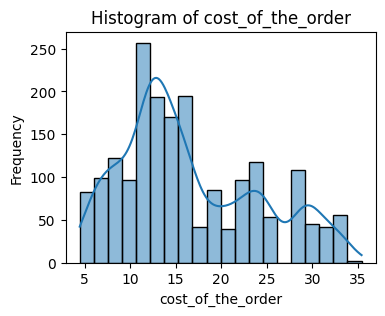

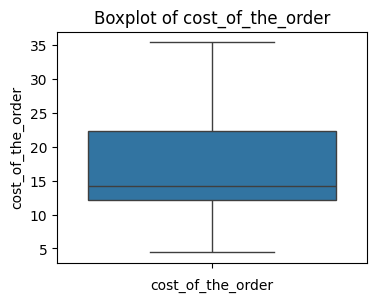

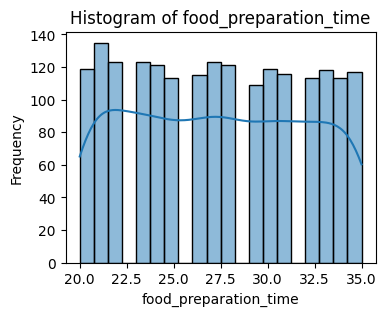

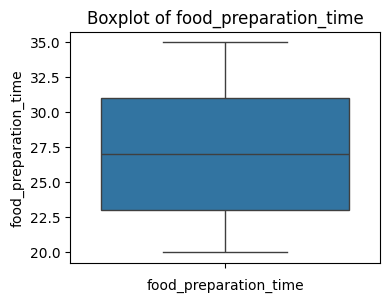

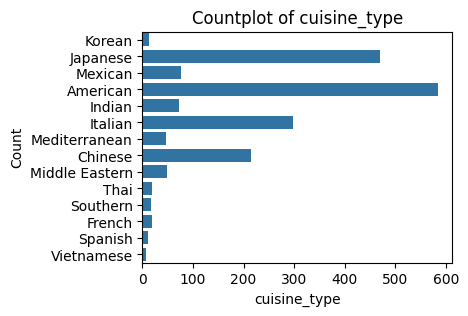

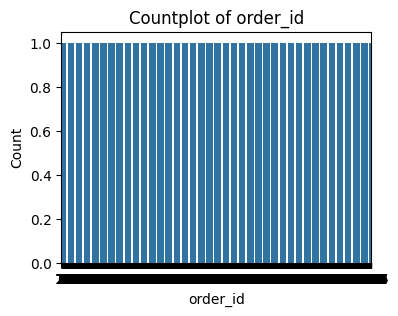

In [90]:
# Continuous Variables Exploration
continuous_vars = ['cost_of_the_order', 'food_preparation_time']

for var in continuous_vars:
# Histogram
    plt.figure(figsize=(4, 3))
    sns.histplot(data[var], bins=20, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Boxplot
    plt.figure(figsize=(4, 3))
    sns.boxplot(data[var])
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)
    plt.show()

# Categorical Variables Exploration
categorical_vars = ['cuisine_type', 'order_id']

for var in categorical_vars:
# Countplot
    plt.figure(figsize=(4, 3))
    sns.countplot(data[var])
    plt.title(f'Countplot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [91]:
restaurant_orders = data['restaurant_name'].value_counts()

top_5_restaurants = restaurant_orders.head(5)

print(top_5_restaurants)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64



#### Observations:
● Shake Shack                  → The Meatball Shop            → Blue Ribbon Sushi             → Blue Ribbon Fried Chicken      → Parm
```




### **Question 8**: Which is the most popular cuisine on weekends?

['Weekend' 'Weekday']


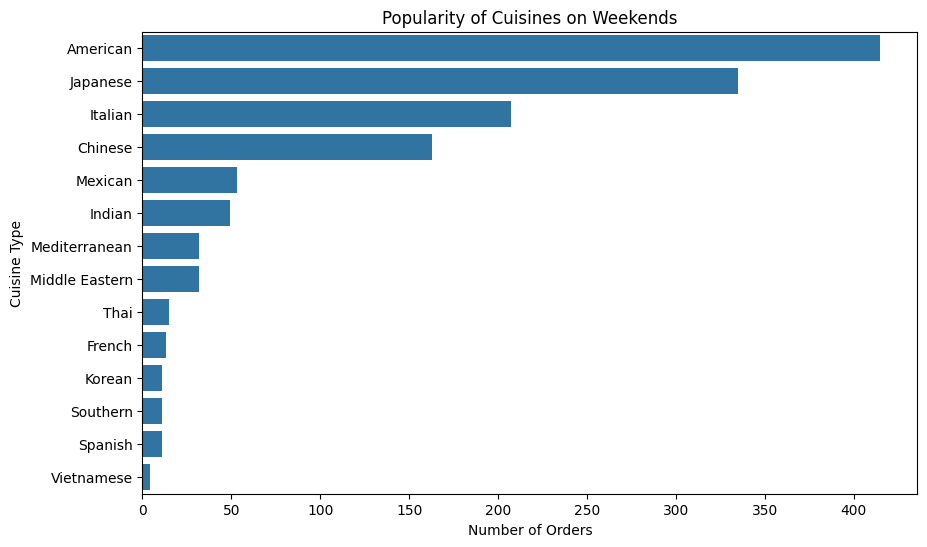

In [92]:
unique_dates = data['day_of_the_week'].unique()
print(unique_dates)


weekend_data = data[data['day_of_the_week'] == 'Weekend']

plt.figure(figsize=(10, 6))
sns.countplot(y='cuisine_type', data=weekend_data, order=weekend_data['cuisine_type'].value_counts().index)
plt.title('Popularity of Cuisines on Weekends')
plt.xlabel('Number of Orders')
plt.ylabel('Cuisine Type')
plt.show()

#### Observations: American Cuisines is the most popular cuisine on weekend

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [44]:
orders_above_20 = data['cost_of_the_order'] > 20


percentage_above_20 = (orders_above_20.sum() / data.shape[0]) * 100

print(percentage_above_20)

29.24130663856691


#### Observations:29.24 %


### **Question 10**: What is the mean order delivery time?

In [50]:
mean_delivery_time = data['delivery_time'].mean()

print(mean_delivery_time)

print(data['delivery_time'].describe())

24.161749209694417
count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64


#### Observations:24.16


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [58]:
order_counts = data.groupby('customer_id').size()
top_3_customers = order_counts.sort_values(ascending=False).head(3)
print(top_3_customers)

customer_id
52832    13
47440    10
83287     9
dtype: int64


In [57]:
order_counts_by_cuisine = data.groupby(['customer_id', 'cuisine_type']).size().reset_index(name='order_count')
order_counts_by_cuisine_sorted = order_counts_by_cuisine.sort_values(['customer_id', 'order_count'], ascending=[True, False])
top_cuisine_per_customer = order_counts_by_cuisine_sorted.drop_duplicates(subset=['customer_id'])
print(top_cuisine_per_customer)

      customer_id cuisine_type  order_count
0            1311      Mexican            1
1            5139     Japanese            1
2            5444     Japanese            1
3            5693      Italian            1
4            6987     Southern            2
...           ...          ...          ...
1366       402215      Chinese            1
1367       403019     American            1
1368       403833         Thai            1
1369       404649      Italian            1
1370       405334     Japanese            1

[1200 rows x 3 columns]


In [62]:
order_counts = data.groupby(['customer_id', 'cuisine_type']).size().reset_index(name='order_count')
sorted_counts = order_counts.sort_values(['customer_id', 'order_count'], ascending=[True, False])

top_cuisine_per_customer = sorted_counts.drop_duplicates(subset=['customer_id'])
specific_customers = top_cuisine_per_customer[top_cuisine_per_customer['customer_id'].isin([52832, 47440, 83287])]

print(specific_customers)

     customer_id cuisine_type  order_count
94         47440     American           10
133        52832     Japanese            3
389        83287     American            4


#### Observations:  
ID #47440 the number of orders -10 <BR>
ID # 52832  the number of orders -3 <BR>
ID # 83287 the number of orders -4


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

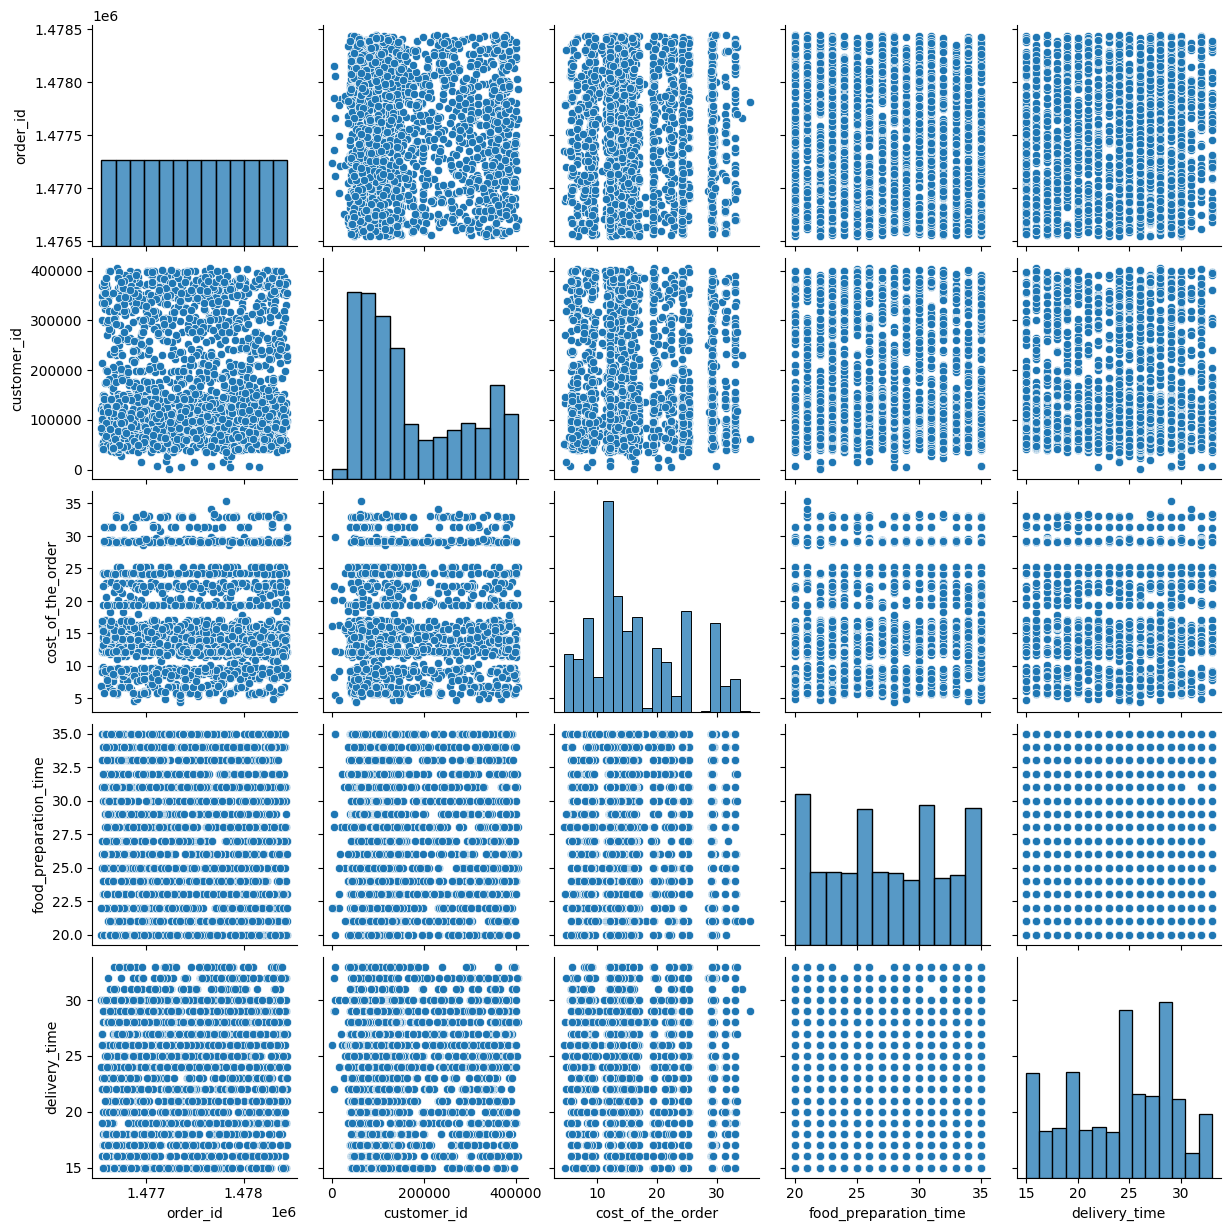

In [63]:
sns.pairplot(data)
plt.show()

<ipython-input-68-cc2b935f80f2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


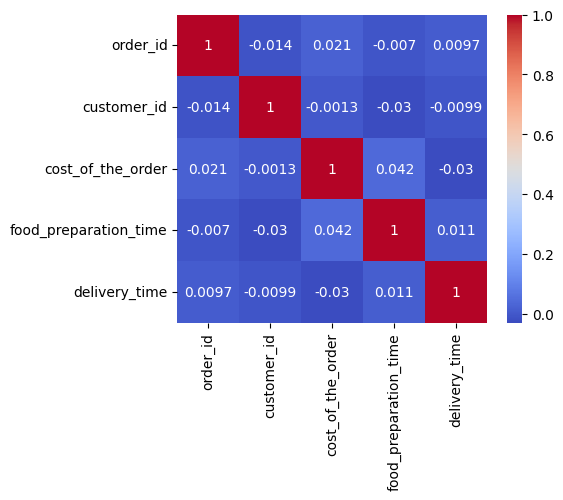

In [68]:
plt.figure(figsize=(5, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [74]:
import numpy as np

corr_matrix = data.corr()

corr_flattened = corr_matrix.unstack().reset_index()
corr_flattened.columns = ['order_id', 'cost_of_the_order', 'Correlation']
corr_flattened = corr_flattened[corr_flattened['order_id'] != corr_flattened['cost_of_the_order']]
corr_flattened['AbsCorrelation'] = corr_flattened['Correlation'].abs()
corr_sorted = corr_flattened.sort_values(by='AbsCorrelation', ascending=False).drop('AbsCorrelation', axis=1)

print(corr_sorted.head())

   order_id cost_of_the_order  Correlation
8         B                 D     0.243567
16        D                 B     0.243567
1         A                 B     0.111729
5         B                 A     0.111729
14        C                 E     0.103170


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [100]:
data = pd.read_csv('https://inabucket.s3.ap-northeast-2.amazonaws.com/foodhub_order.csv')

print(data.columns)

data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

ratings_summary = data.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()
ratings_summary.columns = ['restaurant_name', 'rating_count', 'average_rating']

qualified_restaurants = ratings_summary[(ratings_summary['rating_count'] > 50) &
                                        (ratings_summary['average_rating'] > 4)]

print(qualified_restaurants)


Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')
               restaurant_name  rating_count  average_rating
20   Blue Ribbon Fried Chicken            64        4.328125
21           Blue Ribbon Sushi            73        4.219178
136                Shake Shack           133        4.278195
153          The Meatball Shop            84        4.511905


In [101]:


sorted_qualified_restaurants = qualified_restaurants.sort_values(by='average_rating', ascending=False)

print(sorted_qualified_restaurants)

               restaurant_name  rating_count  average_rating
153          The Meatball Shop            84        4.511905
20   Blue Ribbon Fried Chicken            64        4.328125
136                Shake Shack           133        4.278195
21           Blue Ribbon Sushi            73        4.219178


#### Observations:       The Meatball Shop & Blue Ribbon Fried Chicken  &      Shake Shack & Blue Ribbon Sushi          


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [102]:
revenue_25_percent = data[data['cost_of_the_order'] > 20]['cost_of_the_order'] * 0.25

revenue_15_percent = data[(data['cost_of_the_order'] > 5) & (data['cost_of_the_order'] <= 20)]['cost_of_the_order'] * 0.15

net_revenue = revenue_25_percent.sum() + revenue_15_percent.sum()

print(net_revenue)

6166.303


#### Observations: net revenue generated by the company across all orders = 6166.303

```
# 코드로 형식 지정됨
```




### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [103]:
data['total_time'] = data['food_preparation_time'] + data['delivery_time']

orders_over_60 = data[data['total_time'] > 60]

percentage_over_60 = (len(orders_over_60) / len(data)) * 100

print(percentage_over_60)

10.537407797681771


#### Observations:10.53% of orders are more than 60 minutes to get delivered


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [104]:
mean_delivery_times = data.groupby('day_of_the_week')['delivery_time'].mean()

print(mean_delivery_times)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations: the mean delivery time vary during weekdays is 28.34 and weekends is 22.47


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:

### I suggest that Operational Strategies for Weekdays and Weekends

#### ● Weekends:
- **Focus on High-Value Orders**:Offering coupons(for example 20%..)  to customers who order American cuisine on weekends can be an effective strategy to enhance loyalty and encourage repeat business

#### ● Weekdays:
- **Quick Delivery Focus**: On weekdays focus on offering menu items that are quick to prepare and deliver. This strategy can help attract customers looking for fast meal solutions during their workdays or busy schedules.
- **Promote Popular and Efficient Cuisines**: promote dishes that have been popular among customers and can be prepared efficiently.

By adopting a flexible operational strategy that adjusts to the differing needs and behaviors of customers on weekdays and weekends CEO can better align their offerings with customer expectations and make more revenues.

### Recommendations:

*  Reducing delivery times is critical for enhancing customer satisfaction and competitiveness in the food delivery industry by following efforts ; **Optimize Delivery Routes** (Dynamic Routing Software: Utilize advanced delivery routing software that calculates the fastest routes in real-time, Technology Integration, Real-time Order Tracking Application and Mobile and GPS Technology for Drivers)



---